In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable


nc_file = '/lustre/eaglefs/scratch/lmartine/amrwind_wenoz/post_processing/sampling30000.nc'
#nc_file = '/projects/hfm/tony/IEATask29_precursor_for_ganesh/post_processing/sampling30000.nc'

data = ncdf.Dataset(nc_file, 'r')['p_hub']

x = data['coordinates'][:,0]
y = data['coordinates'][:,1]
z = data['coordinates'][:,2]

xu = np.unique(x)
yu = np.unique(y)
zu = np.unique(z)

# The plane height to sample
zi = 57

# The list of points to sample time histories
xyz_ls = [
    [xu[150], yu[50], zi], 
    [xu[50], yu[50], zi],
    [xu[100], yu[150], zi],
]



3614.1176470588234 1204.7058823529412 57


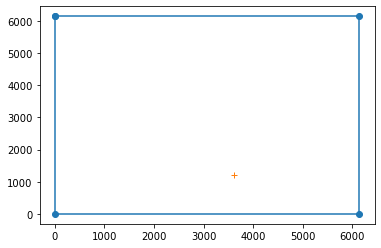

<Figure size 432x288 with 0 Axes>

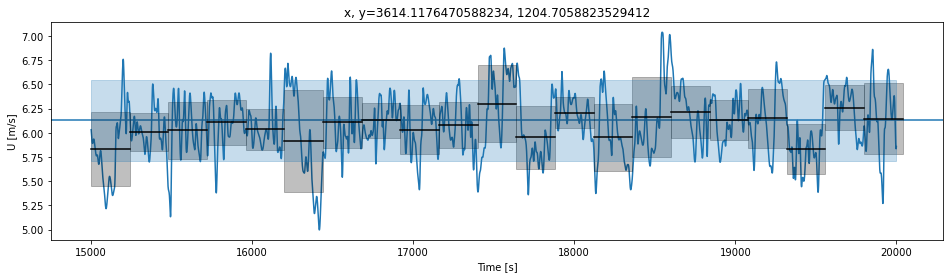

1204.7058823529412 1204.7058823529412 57


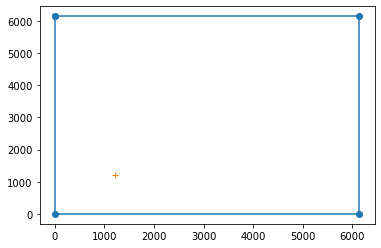

<Figure size 432x288 with 0 Axes>

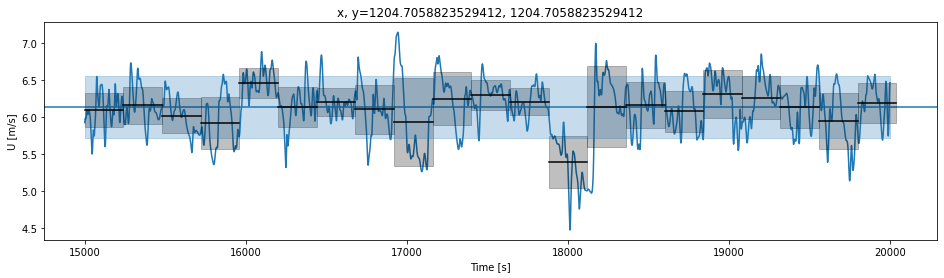

2409.4117647058824 3614.1176470588234 57


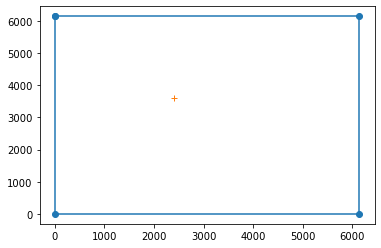

<Figure size 432x288 with 0 Axes>

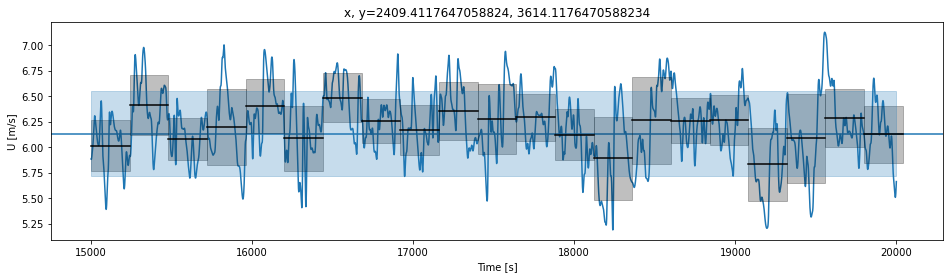

In [2]:
for xyz in xyz_ls:

    # The points to plot
    xi, yi, zi = xyz[:]

    print(xi, yi, zi)

    cond = (data['coordinates'][:,0] == xi) & (data['coordinates'][:,1] == yi) & (data['coordinates'][:,2] == zi)

    u = data['velocityx'][:, cond]

    plt.plot([0, 6144, 6144, 0, 0], [6144, 6144, 0, 0, 6144], 'o-')
    plt.plot(xi, yi, '+')
    plt.show()

    plt.clf()
    plt.figure(figsize=(16, 4))
    time = ncdf.Dataset(nc_file, 'r')['time']

    # A 4 minute time sampling
    dt = 4 * 60 
    time1=np.amin(time) - dt
    time2 = -1
    while time2 < np.amax(time):
        time1 += dt
        time2 = time1 + dt
        um = np.mean(u[(time>time1) & (time<time2)])
        std = np.std(u[(time>time1) & (time<time2)])
        plt.plot([time1, time2], [um, um], '-', c='k')
        plt.fill_between([time1, time2], [um-std, um-std], [um+std, um+std],
        alpha=0.25, edgecolor='k', facecolor='k')

    plt.plot(time, u, '-', zorder=-100)
    Uh = 6.13
    plt.axhline(y=Uh, zorder=-5)
    TI = 0.068  # The turbulence intensity
    plt.fill_between([np.amin(time), np.amax(time)], [Uh * (1-TI), Uh * (1-TI)], [Uh * (1+TI), Uh * (1+TI)],
        alpha=0.25, edgecolor='tab:blue', facecolor='tab:blue')


    plt.xlabel('Time [s]')
    plt.ylabel('U [m/s]')
    plt.title('x, y=' + str(xi) + ', ' + str(yi))
    plt.show()